In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
print(os.listdir('./data/production_plant/'))

['C11.csv', 'C13-1.csv', 'C13-2.csv', 'C14.csv', 'C15.csv', 'C16.csv', 'C7-1.csv', 'C7-2.csv', 'C8.csv', 'C9.csv']


In [3]:
files_list = os.listdir('./data/production_plant/')

In [9]:
number_rows = 0 # total number of rows if all the datasets are joined together
for file in files_list:
    nRowsRead = None # specify 'None' if want to read whole file
    df = pd.read_csv(f'./data/production_plant/{file}', delimiter=',', nrows = nRowsRead)
    df.dataframeName = file
    nRow, nCol = df.shape
    print(f'There are {nRow} rows and {nCol} columns in {file}')
    number_rows = number_rows + nRow


There are 18429 rows and 26 columns in C11.csv
There are 19749 rows and 26 columns in C13-1.csv
There are 3921 rows and 26 columns in C13-2.csv
There are 32848 rows and 26 columns in C14.csv
There are 30737 rows and 26 columns in C15.csv
There are 21021 rows and 26 columns in C16.csv
There are 16973 rows and 26 columns in C7-1.csv
There are 34698 rows and 26 columns in C7-2.csv
There are 15803 rows and 26 columns in C8.csv
There are 34245 rows and 26 columns in C9.csv


In [6]:
number_rows

228424

In [7]:
df.head()

,Timestamp,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,A_3,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
0,0,-99.422931,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-32.881632,-57.008978,-80.708692,...,-97.734994,-76.125215,-82.398205,-93.639475,-25.922493,-97.600790,-65.414477,-100.0,-100.0,-100.0
1,1,-99.422931,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-33.423674,-57.087620,-80.708692,...,-97.734994,-76.125215,-82.398205,-93.639475,-25.922493,-97.600790,-64.943926,-100.0,-100.0,-100.0
2,2,-99.422931,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-33.383021,-56.982764,-80.708692,...,-97.734994,-76.125215,-82.398205,-93.639475,-25.922493,-97.600790,-65.006666,-100.0,-100.0,-100.0
3,3,-99.422931,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-33.477878,-57.048299,-80.708692,...,-97.734994,-76.125215,-82.398205,-93.639475,-25.922493,-97.600790,-67.500588,-100.0,-100.0,-100.0
4,4,-86.909643,-66.186156,-49.950454,-56.782272,-55.576624,-56.891803,-33.396572,-56.995871,-64.332791,...,-87.376367,-73.549015,-82.398205,-83.984598,-25.448693,-87.350998,-82.150420,-100.0,-100.0,-100.0


# Merging all dataframes together

In [23]:
df = pd.read_csv(f'./data/production_plant/{files_list[0]}', delimiter = ',')
df.insert(0, "rtf_id", 1)
rtf_id = 2
for file in files_list[1:]:
    df1 = pd.read_csv(f'./data/production_plant/{file}', delimiter=',')
    df1.insert(0, "rtf_id", rtf_id)
    df = pd.concat([df,df1], ignore_index= True)
    rtf_id += 1 

In [24]:
df.shape

(228424, 27)

In [25]:
df

,rtf_id,Timestamp,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
0,1,0,-20.470767,-49.583696,-49.737023,-60.125877,-67.684702,-67.213115,-75.635206,-75.398126,...,-98.610796,-77.922564,-65.288020,-21.577296,-5.229818,-20.021259,-53.399733,-100.0,-100.0,-100.0
1,1,1,-4.874715,-37.094569,-25.009528,-35.579886,-33.459741,-35.514754,-33.369469,-35.644538,...,-98.610796,-77.922564,-59.527626,-8.114661,-7.114716,-4.532685,-52.568426,-100.0,-100.0,-100.0
2,1,2,25.132878,-40.673543,-25.040018,-35.461876,-33.527460,-35.659016,-33.274612,-35.644538,...,-98.610796,-77.922564,-67.083467,22.033657,-17.198404,25.123377,-47.439417,-100.0,-100.0,-100.0
3,1,3,-90.508732,-76.363862,-25.238204,-35.592998,-33.459741,-35.593443,-33.396572,-35.552789,...,-98.610796,-77.922564,-98.546543,-85.325157,-41.011974,-91.739428,-93.192691,-100.0,-100.0,-100.0
4,1,4,-95.641610,-62.582329,-24.963793,-35.488101,-33.459741,-35.449180,-33.369469,-35.552789,...,-98.610796,-77.922564,-82.718820,-92.213349,-24.248745,-96.082302,-70.919928,-100.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228419,10,34240,-99.331815,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-99.972898,-100.000000,...,-97.765194,-73.324347,-82.547825,-93.710782,-26.761942,-97.600790,-61.242256,-100.0,-100.0,-100.0
228420,10,34241,-99.331815,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-99.972898,-100.000000,...,-97.765194,-73.324347,-82.547825,-93.682259,-26.952491,-97.600790,-66.277155,-100.0,-100.0,-100.0
228421,10,34242,-99.331815,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-99.972898,-100.000000,...,-97.765194,-73.324347,-82.547825,-93.682259,-25.041844,-97.600790,-66.277155,-100.0,-100.0,-100.0
228422,10,34243,-99.331815,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-99.972898,-100.000000,...,-97.765194,-73.324347,-82.547825,-93.653736,-25.026394,-97.600790,-67.061407,-100.0,-100.0,-100.0


In [26]:
df.rename(columns={'Timestamp': 'cycle'}, inplace = True)
df

,rtf_id,cycle,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
0,1,0,-20.470767,-49.583696,-49.737023,-60.125877,-67.684702,-67.213115,-75.635206,-75.398126,...,-98.610796,-77.922564,-65.288020,-21.577296,-5.229818,-20.021259,-53.399733,-100.0,-100.0,-100.0
1,1,1,-4.874715,-37.094569,-25.009528,-35.579886,-33.459741,-35.514754,-33.369469,-35.644538,...,-98.610796,-77.922564,-59.527626,-8.114661,-7.114716,-4.532685,-52.568426,-100.0,-100.0,-100.0
2,1,2,25.132878,-40.673543,-25.040018,-35.461876,-33.527460,-35.659016,-33.274612,-35.644538,...,-98.610796,-77.922564,-67.083467,22.033657,-17.198404,25.123377,-47.439417,-100.0,-100.0,-100.0
3,1,3,-90.508732,-76.363862,-25.238204,-35.592998,-33.459741,-35.593443,-33.396572,-35.552789,...,-98.610796,-77.922564,-98.546543,-85.325157,-41.011974,-91.739428,-93.192691,-100.0,-100.0,-100.0
4,1,4,-95.641610,-62.582329,-24.963793,-35.488101,-33.459741,-35.449180,-33.369469,-35.552789,...,-98.610796,-77.922564,-82.718820,-92.213349,-24.248745,-96.082302,-70.919928,-100.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228419,10,34240,-99.331815,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-99.972898,-100.000000,...,-97.765194,-73.324347,-82.547825,-93.710782,-26.761942,-97.600790,-61.242256,-100.0,-100.0,-100.0
228420,10,34241,-99.331815,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-99.972898,-100.000000,...,-97.765194,-73.324347,-82.547825,-93.682259,-26.952491,-97.600790,-66.277155,-100.0,-100.0,-100.0
228421,10,34242,-99.331815,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-99.972898,-100.000000,...,-97.765194,-73.324347,-82.547825,-93.682259,-25.041844,-97.600790,-66.277155,-100.0,-100.0,-100.0
228422,10,34243,-99.331815,-79.731577,-100.000000,-100.000000,-100.000000,-100.000000,-99.972898,-100.000000,...,-97.765194,-73.324347,-82.547825,-93.653736,-25.026394,-97.600790,-67.061407,-100.0,-100.0,-100.0


# Data preparation

In [34]:
df[df.isna().any(axis=1)]

,rtf_id,cycle,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
60911,4,18812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60912,4,18813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60913,4,18814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60914,4,18815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90861,5,15914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90862,5,15915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90863,5,15916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90864,5,15917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152812,8,9134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152813,8,9135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df = df.dropna()

In [40]:
rtf_ids = df['rtf_id'].unique() 
rtf_ids

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [41]:
train_data = df.loc[df['rtf_id'].isin(list(rtf_ids[:7]))]
train_data.head()

,rtf_id,cycle,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
0,1,0,-20.470767,-49.583696,-49.737023,-60.125877,-67.684702,-67.213115,-75.635206,-75.398126,...,-98.610796,-77.922564,-65.288020,-21.577296,-5.229818,-20.021259,-53.399733,-100.0,-100.0,-100.0
1,1,1,-4.874715,-37.094569,-25.009528,-35.579886,-33.459741,-35.514754,-33.369469,-35.644538,...,-98.610796,-77.922564,-59.527626,-8.114661,-7.114716,-4.532685,-52.568426,-100.0,-100.0,-100.0
2,1,2,25.132878,-40.673543,-25.040018,-35.461876,-33.527460,-35.659016,-33.274612,-35.644538,...,-98.610796,-77.922564,-67.083467,22.033657,-17.198404,25.123377,-47.439417,-100.0,-100.0,-100.0
3,1,3,-90.508732,-76.363862,-25.238204,-35.592998,-33.459741,-35.593443,-33.396572,-35.552789,...,-98.610796,-77.922564,-98.546543,-85.325157,-41.011974,-91.739428,-93.192691,-100.0,-100.0,-100.0
4,1,4,-95.641610,-62.582329,-24.963793,-35.488101,-33.459741,-35.449180,-33.369469,-35.552789,...,-98.610796,-77.922564,-82.718820,-92.213349,-24.248745,-96.082302,-70.919928,-100.0,-100.0,-100.0


In [42]:
test_data = df.loc[df['rtf_id'].isin(list(rtf_ids[7:]))]
test_data.head()

,rtf_id,cycle,L_1,L_2,A_1,A_2,B_1,B_2,C_1,C_2,...,L_4,L_5,L_6,L_7,L_8,L_9,L_10,A_5,B_5,C_5
143678,8,0,-90.584662,-55.088853,-100.0,-100.0,-100.000000,-100.000000,-7.107528,-10.190707,...,-91.226877,-14.401258,-79.90809,-86.922419,-25.932793,-91.192772,-27.911536,-100.0,-100.000000,-3.434675
143679,8,1,-90.584662,-57.189015,-100.0,-100.0,-100.000000,-100.000000,33.288163,7.346484,...,-91.226877,13.697296,-79.90809,-90.730177,-40.579374,-91.192772,-0.211748,-100.0,-100.000000,53.846154
143680,8,2,-90.584662,-57.189015,-100.0,-100.0,-100.000000,-100.000000,33.179755,7.359591,...,-91.226877,13.697296,-79.90809,-84.954364,-30.995236,-91.192772,4.399655,-100.0,-100.000000,53.846154
143681,8,3,-89.430524,-56.207282,-100.0,-100.0,-68.239995,-69.219672,33.206857,7.398912,...,-89.852773,4.770464,-79.90809,-88.648032,-33.034634,-89.719839,-7.442554,-100.0,-76.166604,53.846154
143682,8,4,-89.430524,-54.728470,-100.0,-100.0,11.004266,-14.098361,33.220408,7.307163,...,-90.064174,35.205572,-79.90809,-88.391329,-31.850135,-89.977982,27.958591,-100.0,33.333333,53.846154


# RUL prediction using Pipeline

In [45]:
import importlib
import rul
importlib.reload(rul)

<module 'rul' from 'c:\\Users\\I539001\\OneDrive - SAP SE\\PA2\\AL\\AutoRUL\\rul.py'>

the interval in the cycles with anomalies (for rtf_id = 4):        cycle
18809  18809
18810  18810
18811  18811
18812  18816
18813  18817
18814  18818


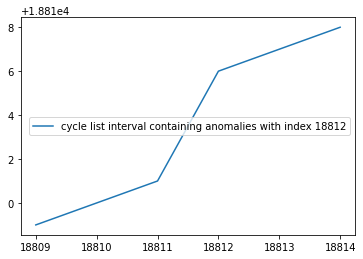

the interval in the cycles with anomalies (for rtf_id = 5):        cycle
15911  15911
15912  15912
15913  15913
15914  15918
15915  15919
15916  15920


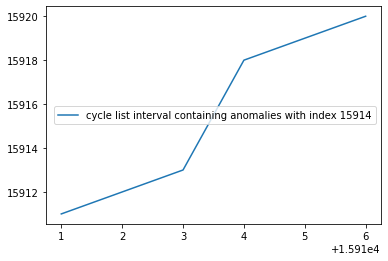

the interval in the cycles with anomalies (for rtf_id = 1):       cycle
9131   9131
9132   9132
9133   9133
9134   9138
9135   9139
9136   9140


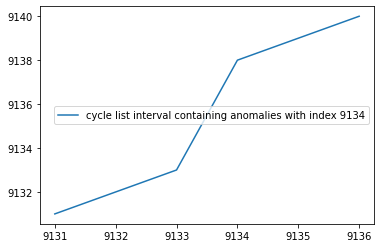

training (143670, 24) (143670,)
testing (84742, 24) (84742,)


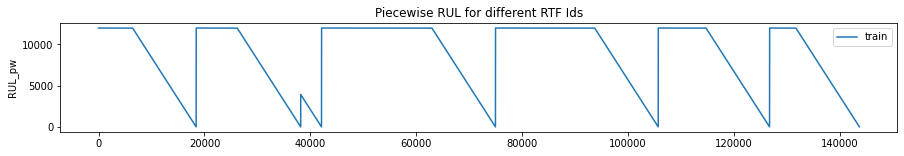

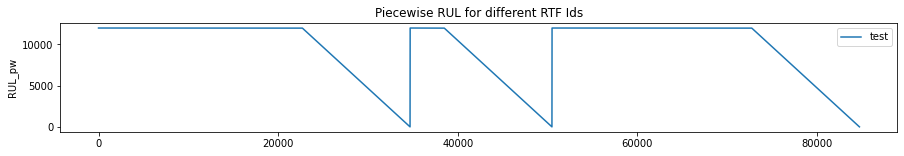

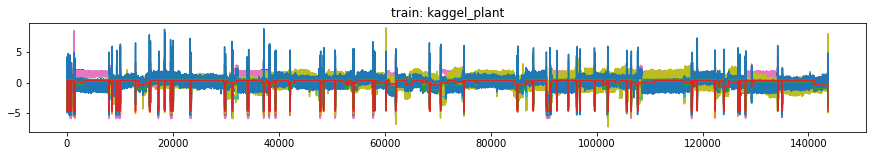

In [46]:
test  = rul.RemainingUsefulLife(train_data,test_data,max_life=12000, epochs= 30)
test.plot_rul()
